In [1]:
from sklearn import model_selection
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal
from sklearn.model_selection import cross_val_score

# 1 Exploring the Data

In [2]:
digits = load_digits()
print(digits.keys())

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [3]:
data.shape

(1797, 64)

### Size of the images
Each image consists of 8 x 8 digits, as shown for the first image in images.

In [4]:
image_example = images[0]
image_shape = images[0].shape

print(f"Example image: \n{image_example}")
print(f"\nShape of a single image: {image_shape}")

Example image: 
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

Shape of a single image: (8, 8)


## Visualize image of 3

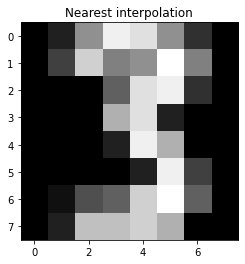

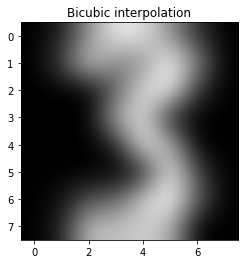

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a 3 image
img = images[13]

assert 2 == len(img.shape)

# Display the image with nearest interpolation
plt.figure()
plt.gray()
plt.imshow(img, interpolation="nearest")
plt.title("Nearest interpolation")
plt.show()

# Display the image with bicubic interpolation
plt.figure()
plt.gray()
plt.imshow(img, interpolation="bicubic")
plt.title("Bicubic interpolation")
plt.show()

## Filter 3 and 9 as well as generate Training and Test set

In [6]:
idx = (target == 3) | (target == 9)

print(idx)

[False False False ... False  True False]


In [7]:
data_cleaned = data[idx]
images_cleaned = images[idx]
target_cleaned = target[idx]

print(target_cleaned)
print(len(target_cleaned))

[3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3
 3 3 3 9 9 3 3 3 9 3 3 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9
 9 9 9 3 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9
 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3
 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3
 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3
 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9
 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 3 9 3 9 3 9 9 9 9 3 3
 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3
 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9]
363


In [8]:
# Get index of 3 and 9
idx_target_3 = (target_cleaned == 3)
idx_target_9 = (target_cleaned == 9)

In [9]:
X_all = images_cleaned
y_all = target_cleaned
X_train , X_test , y_train , y_test = model_selection.train_test_split( 
    X_all , y_all , test_size = 0.4 , random_state = 0
)

# Check if split was successful
print(len(X_all), len(y_all), len(X_train), len(X_test), len(y_train), len(y_test))

363 363 217 146 217 146


# 2 Hand-crafted classifier

## 2.1 Feature construction

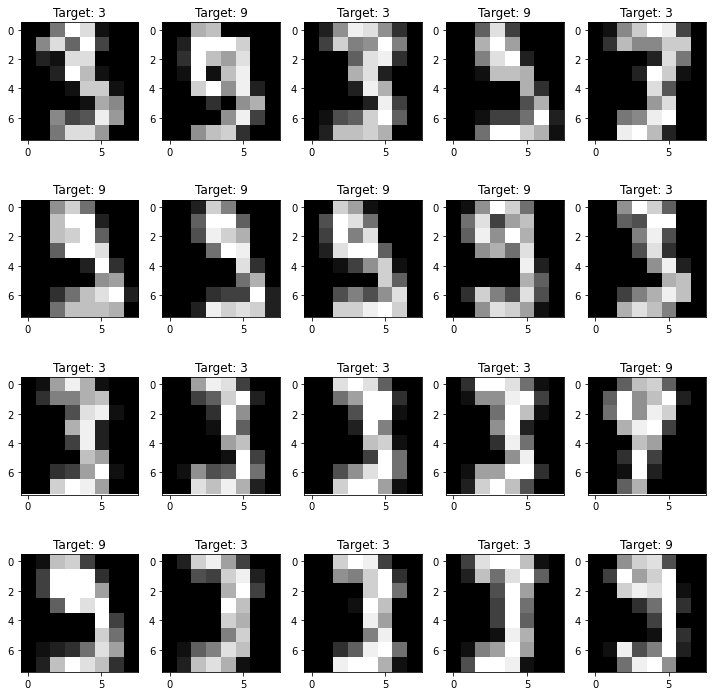

In [10]:
# First let's look at some 3s and 9s 
# Set up the subplots
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(10, 10))
axs = axs.flatten()

# Loop over the images
for i in range(20):
    img = images_cleaned[i]
    target = target_cleaned[i]
    assert 2 == len(img.shape)

    # Display the image with nearest interpolation
    axs[i].imshow(img, interpolation="nearest")
    axs[i].set_title(f"Target: {target}")

# Show the subplots
plt.tight_layout()
plt.show()

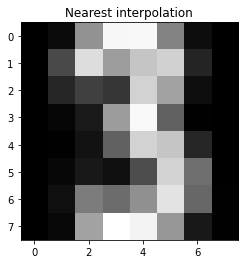

In [11]:
# average image of digit 3
image_sum = np.zeros((8, 8))
for image in images_cleaned[idx_target_3]: 
    image_sum += image
image_avg = image_sum / len(images_cleaned[idx_target_3])

# Generate a 3 image
img = image_avg

assert 2 == len(img.shape)

# Display the image with nearest interpolation
plt.figure()
plt.gray()
plt.imshow(img, interpolation="nearest")
plt.title("Nearest interpolation")
plt.show()

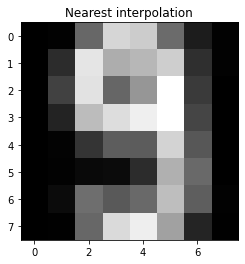

In [12]:
# average image of digit 9
image_sum = np.zeros((8, 8))
for image in images_cleaned[idx_target_9]: 
    image_sum += image
image_avg = image_sum / len(images_cleaned[idx_target_9])

# Generate a 9 image
img = image_avg

assert 2 == len(img.shape)

# Display the image with nearest interpolation
plt.figure()
plt.gray()
plt.imshow(img, interpolation="nearest")
plt.title("Nearest interpolation")
plt.show()

When comparing the two average images of 3s and 9s, it seems like the following pixels could be interesting features: 
- 3, 2: is very dark in the average 3 and quite bright in the average 9 
- 3, 5: is very dark in the average 3 and quite bright in the average 9 

In [13]:
def feature2d(x):
    """This function reduces a #instances x 64 matrix and returns #instances x 2 features.

    :param x: #instances x 64 matrix
    :type x: np.array
    :return: #instances x 2 features
    :rtype: np.array
    """

    features = []
    pixel_1 = (3, 2)
    pixel_2 = (3, 5)

    # Add selected pixels to feature lists
    for instance in x: 
        features.append([instance[pixel_1], instance[pixel_2]])

    return np.array(features)


In [14]:
features = feature2d(images_cleaned)

# Print some of the features
print(len(features))
print(features[:10])

363
[[ 2.  1.]
 [16. 15.]
 [ 0.  2.]
 [ 1. 11.]
 [ 0. 12.]
 [ 6. 14.]
 [ 0. 15.]
 [14.  6.]
 [ 9. 14.]
 [ 0.  3.]]


## 2.2 Scatterplot

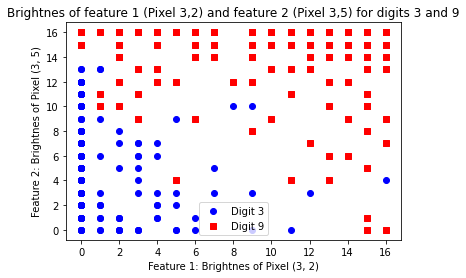

In [15]:
# Split up 2d feature list into two lists
features_1 = features[:, 0]
features_2 = features[:, 1]

# Generate a scatter plot with two different markers
plt.scatter(features_1[y_all==3], features_2[y_all==3], color='b', marker='o', label='Digit 3')
plt.scatter(features_1[y_all==9], features_2[y_all==9], color='r', marker='s', label='Digit 9')

# Add labels and legend
plt.xlabel('Feature 1: Brightnes of Pixel (3, 2)')
plt.ylabel('Feature 2: Brightnes of Pixel (3, 5)')
plt.title('Brightnes of feature 1 (Pixel 3,2) and feature 2 (Pixel 3,5) for digits 3 and 9')
plt.legend()

# Show the plot
plt.show()

## 2.3 Decision Rule 

In [16]:
# generate feature vectors for each class for the training set 
train_features = feature2d(X_train)
# Print some of the features
print(len(train_features))

# generate feature vectors for each class for the test set 
test_features = feature2d(X_test)
# Print some of the features
print(len(test_features))

217
146


In [17]:
test_features[0] - 0

array([ 3., 11.])

In [18]:
def nearest_mean(training_features, training_labels, test_features): 

    # get mean for training features and targets
    mean_train_features_target_3 = np.mean(training_features[training_labels==3], axis=0)
    mean_train_features_target_9 = np.mean(training_features[training_labels==9], axis=0)

    print("Mean for features 1 and 2:")
    print(mean_train_features_target_3)
    print(mean_train_features_target_9)

    # calculate decision boundary for each feature 
    decision_boundary = (mean_train_features_target_3 + mean_train_features_target_9) / 2
    print(f"Decision boundary (feature 1 and 2): {decision_boundary}")

    # calculate distance to decision boundary for both features 
    distance_to_decision_boundaries = test_features - decision_boundary

    # combine distances into one scalar per test feature
    distance_to_decision_boundary = distance_to_decision_boundaries[:,0] + distance_to_decision_boundaries[:,1]

    # prediction for combined distance to decision boundaries
    # negative scalar distance means, that both distances combined were closer to 3 mean value and otherwise to 9 mean value
    feature_1_digit_3_or_not = [3 if scalar_distance < 0 else 9 for scalar_distance in distance_to_decision_boundary]

    return feature_1_digit_3_or_not, distance_to_decision_boundary


In [19]:
test_prediciton, distance_to_decision_boundary = nearest_mean(
    train_features
    , y_train
    , test_features
)
print(test_prediciton[:10])
print(len(test_prediciton))

train_prediciton, _ = nearest_mean(
    train_features
    , y_train
    , train_features
)
print(train_prediciton[:10])
print(len(train_prediciton))

Mean for features 1 and 2:
[1.45045045 5.58558559]
[ 9.99056604 13.95283019]
Decision boundary (feature 1 and 2): [5.72050824 9.76920789]
[3, 9, 9, 3, 3, 9, 9, 9, 3, 3]
146
Mean for features 1 and 2:
[1.45045045 5.58558559]
[ 9.99056604 13.95283019]
Decision boundary (feature 1 and 2): [5.72050824 9.76920789]
[9, 9, 9, 3, 9, 9, 3, 3, 9, 9]
217


In [20]:
# Now let's compare y_test and the predictions 
test_error = np.mean(test_prediciton != y_test) * 100
train_error = np.mean(train_prediciton != y_train) * 100

# print the errors
print(f"Test error: {test_error}%")
print(f"Training error: {train_error}%")

Test error: 6.164383561643835%
Training error: 5.529953917050691%


## 2.4 Visualize the decision regions

In [21]:
min_brightness = np.min(np.ndarray.flatten(distance_to_decision_boundary))
max_brightness = np.max(np.ndarray.flatten(distance_to_decision_boundary))

print(f"Min brightness: {min_brightness}")
print(f"Max brightness: {max_brightness}")

Min brightness: -15.489716131225565
Max brightness: 16.510283868774437


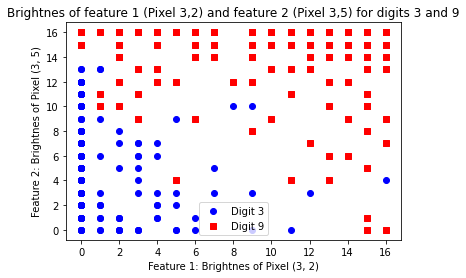

In [22]:
# Split up 2d feature list into two lists
features_1 = features[:, 0]
features_2 = features[:, 1]

# Generate a scatter plot with two different markers
plt.scatter(features_1[y_all==3], features_2[y_all==3], color='b', marker='o', label='Digit 3')
plt.scatter(features_1[y_all==9], features_2[y_all==9], color='r', marker='s', label='Digit 9')

# Add labels and legend
plt.xlabel('Feature 1: Brightnes of Pixel (3, 2)')
plt.ylabel('Feature 2: Brightnes of Pixel (3, 5)')
plt.title('Brightnes of feature 1 (Pixel 3,2) and feature 2 (Pixel 3,5) for digits 3 and 9')
plt.legend()

# Add decision boundary (feature 1 and 2): 
# feature 1 + 2 < 0 ==> 3
# feature 1 + 2 >= 0 ==> 9


# Show the plot
plt.show()

## Exercise 3 LDA

In [56]:
# Redefine labels being -1 for digits with label 3 and 1 for digits with label 9
target_cleaned[idx_target_3] = -1
target_cleaned[idx_target_9] = 1
# Reduce data to pixels (3, 2) and (3, 5)
data_reduced = []
data_reduced.append(data_cleaned[:,26])
data_reduced.append(data_cleaned[:,29])
data_reduced = np.vstack(data_reduced).T

In [57]:
X_all = data_reduced
y_all = target_cleaned
X_train , X_test , y_train , y_test = model_selection.train_test_split( 
    X_all , y_all , test_size = 0.4 , random_state = 0
)

### 3.1 LDA Training

In [58]:
def fit_lda(training_features, training_labels):
    """
    Fit gaussian distributions on two class clusters induced by training_features and training_labels.
    
    :param np.ndarray training_features: The training feature matrix of shape N x D,
    where N is the number of training instances and D is the number of feature dimensions.
    :param np.ndarray training_labels: The training labels of shape N x 1 
    with the respective labels for each instance in training_features.
    :return np.ndarray mu, np.ndarray covmat, np.ndarray p: The cluster centers mu of shape C x D, 
    where C is the number of unique classes in training_labels.
    the covariance matrix covmat of shape D x D, and the priors p of shape C x 1.
    """
    if training_features.shape[0] != training_labels.shape[0]:
        raise ValueError(
            "The length of training_features and training_labels is not the same:\n" +
            f"number of instances in training_features = {training_features.shape[0]}\n" +
            f"number of instances in training_labels = {training_labels.shape[0]}"
        )
    
    # Get all different class labels from the training_labels
    class_labels = np.unique(training_labels)
    class_labels.sort()
    mu = compute_class_means(training_features, training_labels, class_labels)
    p = approximate_priors(training_labels, class_labels)
    covmat = approximate_covariance_matrix(training_features, training_labels, mu, p, class_labels)
    return mu, covmat, p


def compute_class_means(training_features, training_labels, class_labels):
    """
    Compute the cluster centers for each class cluster.
    
    :param np.ndarray training_features: The training feature matrix of shape N x D,
    where N is the number of training instances and D is the number of feature dimensions.
    :param np.ndarray training_labels: The training labels of shape N x 1 
    with the respective labels for each instance in training_features.
    :param np.ndarray class_labels: The labels for each class in training_labels.
    :return np.ndarray mu: The class means of shape C x D, 
    where C is the number of different classes in training_labels and D is the number of feature dimensions.
    """
    mu = np.zeros([class_labels.shape[0], training_features.shape[1]])
    for i, label in enumerate(class_labels):
        class_mask = (training_labels == label)
        mu[i, :] = np.sum(training_features[class_mask, :], axis=0) / np.count_nonzero(class_mask)
    return np.vstack(mu)


def approximate_covariance_matrix(training_features, training_labels, mu, p, class_labels):
    """
    Approximate the covariance matrix from the given training data.
    
    :param np.ndarray training_features: The training feature matrix of shape N x D,
    where N is the number of training instances and D is the number of feature dimensions.
    :param np.ndarray training_labels: The training labels of shape N x 1 
    with the respective labels for each instance in training_features.
    :param np.ndarray mu: The trained cluster centers of shape C x D, where C is the number of classes.
    :param np.ndarray class_labels: The labels for each of the C classes in training_labels.
    :return np.ndarray covmat: The approximated covariance matrix of shape D x D.
    """
    N, D = training_features.shape
    cov = np.zeros([D, D])
    for i, label in enumerate(class_labels):
        class_mask = (training_labels == label)
        class_instances = training_features[class_mask]
        centered_instances = (class_instances - mu[i])
        cov += centered_instances.T @ centered_instances
    return cov / N


def approximate_priors(training_labels, class_labels):
    """
    Approximate the class priors for each class label in class_labels.
    
    :param np.ndarray training_labels: The training labels of shape N x 1 
    with the respective labels for each instance in training_features.
    :param np.ndarray class_labels: The labels for each class in the training set.
    :param np.ndarray p: The priors of shape C x 1, where C is the number of different classes in training_labels.
    """
    N = training_labels.shape[0]
    p = np.zeros([class_labels.shape[0]])
    for i, label in enumerate(class_labels):
        N_class = training_labels[training_labels == label].shape[0]
        p[i] = N_class / N
    return p


In [59]:
mu, cov, p = fit_lda(X_train, y_train)
print(mu.shape, cov.shape, p.shape)
print(np.linalg.det(cov))

(2, 2) (2, 2) (2,)
238.1979716803982


### 3.2 LDA prediction

In [60]:
def predict_lda(mu, covmat, p, test_features):
    """
    Predict the labels from the features of the test instances in test_features.
    
    :param np.ndarray mu: The trained cluster centers of shape 2 x D, where D is the number of feature dimensions.
    :param np.ndarray covmat: The trained covariance matrix of shape D x D.
    :param np.ndarray p: The trained priors of shape 2 x 1 for each class in the training set.
    :param np.ndarray test_features: The test instances of shape M x D for which the labels are to be predicted.
    :return np.ndarray predictions: The predicted labels.
    """
    # We use the moore-penrose inverse in case the covariance matrix is singular.
    precmat = np.linalg.pinv(covmat)
    left_hand_side = test_features @ precmat @ (mu[1] - mu[0]).T
    right_hand_side = 1/2 * (mu[1] + mu[0]) @ precmat @ (mu[1] - mu[0]) - np.log(p[1]/p[0])
    return np.sign(left_hand_side - right_hand_side)

def error_rate(y_pred, y_true):
    return np.mean(np.abs(y_true - y_pred)/2)

In [61]:
train_predictions = predict_lda(mu, cov, p, X_train)
test_predictions = predict_lda(mu, cov, p, X_test)

In [62]:
print(f"The error rate on the training set is: {error_rate(train_predictions, y_train)}")
print(f"The error rate on the test set is: {error_rate(test_predictions, y_test)}")

The error rate on the training set is: 0.055299539170506916
The error rate on the test set is: 0.06164383561643835


### 3.3 Visualization

In [63]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [64]:
# plotting the decision regions
def plot_lda_evaluation(covmat, mu, p, X_eval, y_eval, title, xlabel, ylabel, class_labels, 
                        std_multiples=[1.0, 2.0, 3.0], cmap='Set3', edgecolors=['blue', 'purple', 'red']):
    """
    Does the evaluation plot specified by task 3.3 for 2-dimensional data.
    
    :param np.ndarray covmat: The trained covariance matrix of shape 2 x 2.
    :param np.ndarray mu: The trained class means of shape 2 x 2.
    :param np.ndarray p: The trained priors of shape 2 x 1.
    :param np.ndarray X_eval: The features on which the evaluation will take place of shape N' x 2, 
    where N' is the number of evaluation instances.
    :param np.ndarray y_eval: The labels of the evaluation instances. This input has shape N' x 1.
    :param str title: The plot title.
    :param str xlabel: The x-axis label of the plot.
    :param str ylabel: The y-axis label of the plot.
    :param List[str] class_labels: The legend labels of each class.
    :param List[float] std_multiples: Optional factors with which each standard deviation should be multiplied with 
    to create the distribution ellipses. The length of this list defines the number of ellipses. 
    Default: [1.0, 2.0, 3.0]
    :param str cmap: The colormap used. See matplotlib colormap documentation for more details. Default: 'Set3'
    :param str edgecolors: The edgecolors of the distribution ellipses. 
    If one color is given all ellipses have the same color 
    otherwise there has to be a color for each ellipses induced by std_multiples. Default: ['blue', 'purple', 'red']
    """
    plot_decision_regions(covmat, mu, p, cmap)
    plot_class_scatter(X_eval, y_eval, class_labels, cmap)
    eigenvals, eigenvecs = np.linalg.eig(covmat)
    eigenvecs = eigenvecs.T
    plot_distribution_main_axes(mu, eigenvecs)
    std = np.sqrt(eigenvals)
    ax = plt.gca()
    plot_lda_error_ellipses(ax, mu, eigenvecs, std, std_multiples, edgecolors)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.plot()
    
    
def plot_decision_regions(covmat, mu, p, cmap):
    """
    Plots the decision regions as filled countours.
    
    :param np.ndarray covmat: The trained covariance matrix of shape 2 x 2.
    :param np.ndarray mu: The trained class means of shape 2 x 2.
    :param np.ndarray p: The trained priors of shape 2 x 1.
    :param str cmap: The colormap used. See matplotlib colormap documentation for more details.
    """
    x = np.linspace(-6, 20, num=200)
    y = np.linspace(-2, 21, num=200)
    xv, yv = np.meshgrid(x, y)
    grid_points = np.stack([xv, yv], axis=-1)
    predictions = predict_lda(mu, covmat, p, grid_points)
    plt.contourf(xv, yv, predictions, cmap=cmap)
    

def plot_class_scatter(X_eval, y_eval, class_labels, cmap):
    """
    Plots the gound truth labelled instances as a scatter plot from X_eval and y_eval.
    
    :param np.ndarray X_eval: The features on which the evaluation will take place of shape N' x 2, 
    where N' is the number of evaluation instances.
    :param np.ndarray y_eval: The labels of the evaluation instances. This input has shape N' x 1.
    :param List[str] class_labels: The legend labels of each class.
    :param str cmap: The colormap used. See matplotlib colormap documentation for more details.
    """
    plt.scatter(X_eval[y_eval == -1, 0], X_eval[y_eval == -1, 1], label=class_labels[0], cmap=cmap)
    plt.scatter(X_eval[y_eval == 1, 0], X_eval[y_eval == 1, 1], label=class_labels[1], cmap=cmap)

    
def plot_distribution_main_axes(mu, eigenvecs):
    """
    Plots the main distribution axes as arrows.
    
    :param np.ndarray mu: The trained class means of shape 2 x 2.
    :param np.ndarray eigenvecs: The eigenvectors of the trained covariance matrix 
    such that the row corresponds to one eigenvalue. The shape is 2 x 2.
    """
    for i in range(mu.shape[0]):
        plt.arrow(mu[i, 0], mu[i, 1], eigenvecs[0, 0], eigenvecs[0, 1], head_width=0.5, head_length=0.5)
        plt.arrow(mu[i, 0], mu[i, 1], eigenvecs[1, 0], eigenvecs[1, 1], head_width=0.5, head_length=0.5) 

    
def plot_lda_error_ellipses(ax, mu, eigenvecs, std, std_multiples, edgecolors):
    """
    Plots the lda distribution ellipses.
    
    :param plt.Axes object ax: The matplotlib axes of the current plot where the ellipses should be drawn.
    :param np.ndarray mu: The trained class means of shape 2 x 2.
    :param np.ndarray eigenvecs: The eigenvectors of the trained covariance matrix 
    such that the row corresponds to one eigenvalue. The shape is 2 x 2.
    :param np.ndarray std: The standard deviations induced by the eigenvalues of the trained covariance matrix.
    :param List[float] std_multiples: Optional factors with which each standard deviation should be multiplied with 
    to create the distribution ellipses. The length of this list defines the number of ellipses.
    :param str edgecolors: The edgecolors of the distribution ellipses. 
    If one color is given all ellipses have the same color 
    otherwise there has to be a color for each ellipses induced by std_multiples.
    """
    if len(edgecolors) > 0:
        if len(edgecolors) != len(std_multiples):
            raise ValueError(
                "For each deviation multiple (std_multiple)" 
                "there has to be at least one edgecolor if multiple edgecolors are provided!"
            )
    else:
        edgecolors = len(std_multiples) * edgecolors
    
    max_std = np.argmax(std)
    ellipses_angle = np.rad2deg(np.arctan(eigenvecs[max_std, 1]/eigenvecs[max_std, 0]))
    for i in range(mu.shape[0]):
        for j, multiple in enumerate(std_multiples):
            plot_error_ellipse(ax, mu[i, :], multiple * std, ellipses_angle, edgecolor=edgecolors[j])
    
    
def plot_error_ellipse(ax, center, std, angle, **kwargs):
    """
    Plots a single distribution ellipsis.
    
    :param plt.Axes object ax: The matplotlib axes of the current plot where the ellipsis should be drawn.
    :param np.ndarray center: The center of the ellipsis of shape 1 x 2.
    :param np.ndarray std: The standard deviation of the distribution ellipses in both dimensions.
    :param float angle: The angle of the distribution ellipsis in degrees.
    :param kwargs: The keword arguments of the Ellipse class in matplotlib.patches. 
    See matplotlib's documentation for more details.
    """
    ellipsis = Ellipse(center, std[0], std[1], angle=angle, facecolor="none", **kwargs)
    ax.add_patch(ellipsis)

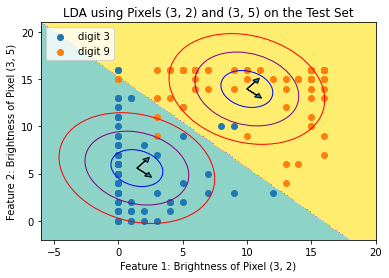

In [65]:
plot_lda_evaluation(
    cov, mu, p, X_test, y_test, 'LDA using Pixels (3, 2) and (3, 5) on the Test Set', 
    'Feature 1: Brightness of Pixel (3, 2)', 'Feature 2: Brightness of Pixel (3, 5)', ['digit 3', 'digit 9']
)

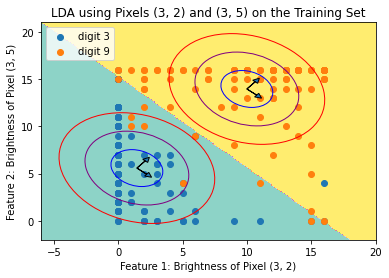

In [66]:
plot_lda_evaluation(
    cov, mu, p, X_train, y_train, 'LDA using Pixels (3, 2) and (3, 5) on the Training Set', 
    'Feature 1: Brightness of Pixel (3, 2)', 'Feature 2: Brightness of Pixel (3, 5)',['digit 3', 'digit 9']
)

One can see that the fitted distributions do not quite fit the data because the covariances are shared. While the centers seem to be at about the right position the angle of the distributions are off by quite a margin. Also the data with our chosen features is not linearly separable. QDA could resolve these issues by fitting bespoke clusters to each class and therefore creating a quadric decision boundary. Another approach would be to choose the features or their scaling differently such that the classes become linearly separable. 

### 3.4 Quantitative Analysis

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold

In [68]:
# Use all 64 features
X_all = data_cleaned

In [69]:
# cross-validation
n_folds = 10
our_error_rates = np.zeros([n_folds])
sklearn_error_rates = np.zeros([n_folds])
for i, (train, test) in enumerate(KFold(n_splits=n_folds, shuffle=True).split(X_all, y_all)):
    X_train, y_train = X_all[train], y_all[train]
    X_test, y_test = X_all[test], y_all[test]
    
    mu_trained, cov_trained, p_trained = fit_lda(X_train, y_train)
    sklearn_lda = LinearDiscriminantAnalysis()
    sklearn_lda.fit(X_train, y_train)
    
    our_predictions = predict_lda(mu_trained, cov_trained, p_trained, X_test)
    sklearn_predictions = sklearn_lda.predict(X_test)
    
    our_error_rates[i] = error_rate(our_predictions, y_test)
    sklearn_error_rates[i] = error_rate(sklearn_predictions, y_test)
our_average_error_rate = np.mean(our_error_rates)
sklearn_average_error_rate = np.mean(sklearn_error_rates)

In [70]:
print(f"Our average error rate is {our_average_error_rate}.")
print(f"Sklearn's average error rate is {sklearn_average_error_rate}.")

Our average error rate is 0.01096096096096096.
Sklearn's average error rate is 0.01096096096096096.


Our error rates are the same as the error rates achieved by sklearn's LDA algorithm.

## Exercise 4 SVM


In [38]:
X_all = data_cleaned
y_all = target_cleaned
X_train , X_test , y_train , y_test = model_selection.train_test_split( 
    X_all , y_all , test_size = 0.4 , random_state = 0
)

# Check if split was successful
print(len(X_all), len(y_all), len(X_train), len(X_test), len(y_train), len(y_test))

363 363 217 146 217 146


In [41]:
input_data_cleaned = feature2d(images_cleaned)
# use the below code to execute on the 64 feature list
# input_data_cleaned = data_cleaned

target_cleaned = target_cleaned
print(input_data_cleaned.shape)


X_all = input_data_cleaned
y_all = target_cleaned
X_train , X_test , y_train , y_test = model_selection.train_test_split( 
    X_all , y_all , test_size = 0.4 , random_state = 0
)

# Check if split was successful
print(len(X_all), len(y_all), len(X_train), len(X_test), len(y_train), len(y_test))

(363, 2)
363 363 217 146 217 146


In [42]:
from sklearn.base import BaseEstimator, ClassifierMixin

# define class to later on use the sckit learn cross-validation
class SVMClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, lmbda=0.01, learning_rate=0.001, num_iters=100):
        self.lmbda = lmbda
        self.learning_rate = learning_rate
        self.num_iters = num_iters

    def fit(self, X, y):
        self.mu, self.covmat, self.beta, self.b = fit_svm(X, y)
        return self

    def predict(self, X):
        return predict_svm(X, self.beta, self.b)

    
    def accuracy(self, X, y):
        return svm_accuracy(self.predict(X,y), y)
        


def fit_svm(training_features, training_labels):
    training_labels[training_labels == 3] = -1
    training_labels[training_labels == 9] = 1    
    num_iters=50
    
    # Initialize the parameters
    num_samples, num_features = training_features.shape
    beta = np.random.normal(size=(num_features))
    b = 0
    
    learning_rate=0.2
    lmbda = 0.01
    N = num_samples
    
    # parameters for avoiding stagnation
    epsilon = 0.05
    last_loss = 0
    
    # Gradient descent to optimize the parameters
    for i in range(num_iters):
        
        # Compute the loss
        scores = training_labels * np.dot(training_features, beta) + b
        relu = np.maximum(0, 1 - scores)
        loss = 0.5 * np.dot(beta.T, beta) + (lmbda/N) * np.sum(relu)

        # Compute the gradients       
        sum_constraint = (scores < 1)
        d_beta = beta + (lmbda/N) * np.sum(-training_labels*training_features.T, where=sum_constraint)      
        d_b = (lmbda/N) * np.sum(-training_labels,where=sum_constraint)

        # adjust learning rate if stagnating in loss
        if abs(loss-last_loss) <= epsilon:
            print(f"loss: {loss}, last_loss: {last_loss}")
            print(abs(loss-last_loss))
            learning_rate = learning_rate/10
            print(f"adjusted rate to {learning_rate}")
        # set last loss to this loss
        last_loss = loss
        
        # Update the parameters
        beta = beta - learning_rate * d_beta
        b = b - learning_rate * d_b
        
        
        
    mu = np.mean(training_features, axis=0)
    covmat = np.cov(training_features.T)

    return mu, covmat, beta, b
    
    
def predict_svm(test_features, beta, b):
    scores = np.dot(test_features, beta) + b
    preds = np.where(scores >= 0, 1, -1)
    return preds    
    
def visualize_svm(mu, covmat, X_train, y_train, b, beta):
    colors = ['b', 'r']
    classes = ["Digit 3", "Digit 9"]

    # Plot the training data as scatter plots
    plt.scatter(X_train[(y_train==-1),0], X_train[(y_train==-1),1], c=colors[0], label=f'{classes[0]}')
    plt.scatter(X_train[(y_train==1),0], X_train[(y_train==1),1], c=colors[1], label=f'{classes[1]}')

    
    # don't know how to print the ellipses though....
    
    
def cross_validate(X_train, y_train):
    return cross_val_score(estimator=fit_svm, X=X_train, y=y_train, cv=10, scoring=svm_accuracy)

    
def svm_accuracy(prediction, truth):
    return np.mean(prediction == truth)
    

In [43]:
mu, covmat, beta, b = fit_svm(X_train,y_train)
predictions = predict_svm(X_test, beta, b)

loss: 0.03489139372237405, last_loss: 0
0.03489139372237405
adjusted rate to 0.02
loss: 0.033724507676619775, last_loss: 0.03489139372237405
0.0011668860457542743
adjusted rate to 0.002
loss: 0.03361142593188302, last_loss: 0.033724507676619775
0.00011308174473675242
adjusted rate to 0.0002
loss: 0.033600152845689624, last_loss: 0.03361142593188302
1.1273086193398785e-05
adjusted rate to 2e-05
loss: 0.03359902588699757, last_loss: 0.033600152845689624
1.1269586920534258e-06
adjusted rate to 2.0000000000000003e-06
loss: 0.033598913194626684, last_loss: 0.03359902588699757
1.1269237088634698e-07
adjusted rate to 2.0000000000000004e-07
loss: 0.03359890192542458, last_loss: 0.033598913194626684
1.1269202106201082e-08
adjusted rate to 2.0000000000000004e-08
loss: 0.033598900798504715, last_loss: 0.03359890192542458
1.1269198629815236e-09
adjusted rate to 2.0000000000000005e-09
loss: 0.03359890068581273, last_loss: 0.033598900798504715
1.1269198768593114e-10
adjusted rate to 2.00000000000000

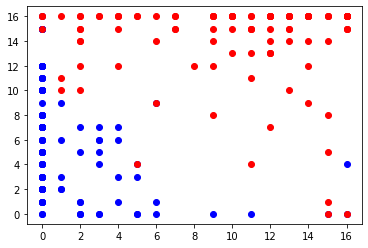

In [44]:
visualize_svm(mu, covmat, X_train, y_train, b, beta)

In [45]:
model = SVMClassifier()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy")

loss: 0.06034507086703027, last_loss: 0.10108648769506048
0.040741416828030216
adjusted rate to 0.02
loss: 0.057594370625915894, last_loss: 0.06034507086703027
0.0027507002411143733
adjusted rate to 0.002
loss: 0.057329181329950483, last_loss: 0.057594370625915894
0.0002651892959654109
adjusted rate to 0.0002
loss: 0.05730275151413729, last_loss: 0.057329181329950483
2.64298158131962e-05
adjusted rate to 2e-05
loss: 0.05730010942117676, last_loss: 0.05730275151413729
2.6420929605253107e-06
adjusted rate to 2.0000000000000003e-06
loss: 0.0572998452207644, last_loss: 0.05730010942117676
2.6420041236013825e-07
adjusted rate to 2.0000000000000004e-07
loss: 0.05729981880081201, last_loss: 0.0572998452207644
2.6419952392497947e-08
adjusted rate to 2.0000000000000004e-08
loss: 0.05729981615881766, last_loss: 0.05729981880081201
2.641994352459154e-09
adjusted rate to 2.0000000000000005e-09
loss: 0.05729981589461823, last_loss: 0.05729981615881766
2.641994262253533e-10
adjusted rate to 2.000000

In [46]:
print(scores)

[0.45454545 0.31818182 0.5        0.18181818 0.5        0.45454545
 0.45454545 0.42857143 0.76190476 0.47619048]


In [47]:
print('Accuracy: {:.2f} (+/- {:.2f})'.format(scores.mean(), scores.std()))

Accuracy: 0.45 (+/- 0.14)


### accuracy of scikit learn classifier

In [48]:
from sklearn import svm
clf = svm.SVC()
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print('Accuracy: {:.2f} (+/- {:.2f})'.format(scores.mean(), scores.std()))

Accuracy: 0.93 (+/- 0.07)
